In [1]:
def clip(poly_points, clip_points):
   def inside(p):
      return(cp2[0]-cp1[0])*(p[1]-cp1[1]) > (cp2[1]-cp1[1])*(p[0]-cp1[0])
      
   def computeIntersection():
      dc = [ cp1[0] - cp2[0], cp1[1] - cp2[1] ]
      dp = [ s[0] - e[0], s[1] - e[1] ]
      n1 = cp1[0] * cp2[1] - cp1[1] * cp2[0]
      n2 = s[0] * e[1] - s[1] * e[0] 
      n3 = 1.0 / (dc[0] * dp[1] - dc[1] * dp[0])
      return [(n1*dp[0] - n2*dc[0]) * n3, (n1*dp[1] - n2*dc[1]) * n3]

   outputList = poly_points
   cp1 = clip_points[-1]
   
   for clipVertex in clip_points:
      cp2 = clipVertex
      inputList = outputList
      outputList = []
      s = inputList[-1]

      for subjectVertex in inputList:
         e = subjectVertex
         if inside(e):
            if not inside(s):
               outputList.append(computeIntersection())
            outputList.append(e)
         elif inside(s):
            outputList.append(computeIntersection())
         s = e
      cp1 = cp2
   return(outputList)

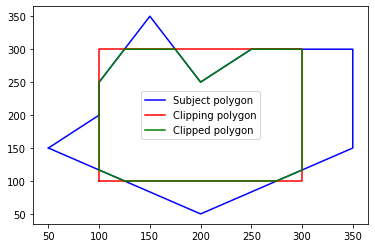

In [2]:
subjectPolygon = [(50,150),(200,50),(350,150),(350,300),(250,300),(200,250),(150,350),(100,250),(100,200)]
clipPolygon = [(100,100),(300,100),(300,300),(100,300)]

#subjectPolygon = [(100,150), (200,250), (300,100)]
#clipPolygon = [(100,100), (100,200), (200,200), (100,100)]

clippedPolygon = clip(subjectPolygon, clipPolygon)

# Plot the original polygons and the resulting clipped polygon
import matplotlib.pyplot as plt

subjectPolygon.append(subjectPolygon[0])
clipPolygon.append(clipPolygon[0])
clippedPolygon.append(clippedPolygon[0])

plt.plot([p[0] for p in subjectPolygon], [p[1] for p in subjectPolygon], 'b-', label='Subject polygon')
plt.plot([p[0] for p in clipPolygon], [p[1] for p in clipPolygon], 'r-', label='Clipping polygon')
plt.plot([p[0] for p in clippedPolygon], [p[1] for p in clippedPolygon], 'g-', label='Clipped polygon')
plt.legend()
plt.show()
